<IPython.core.display.Javascript object>


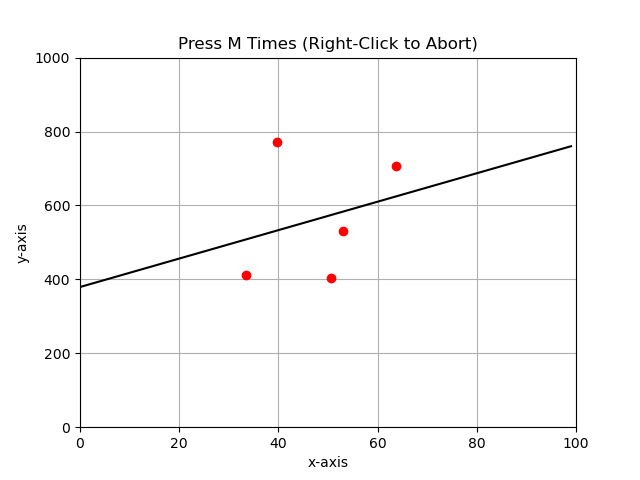

In [71]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

ix, iy = 0, 0
c, m = 0, 0
a = []
b = []

def onclick(event):
    if event.button == 1:
        print ('left click pressed')
        ix, iy = event.xdata, event.ydata
        plt.plot(ix, iy, marker='o', color='red')
        a.append(ix)
        b.append(iy)

    elif event.button == 3:
        c, m = lr()
        xfinal, yfinal = coords(c, m)
        plt.plot(xfinal, yfinal,'k')
        plt.show()
        plt.ioff()

def lr():
    xpoints = np.array(a)
    ypoints = np.array(b)
    
    xmean = np.mean(xpoints)
    #print ('mean of x: ', xmean)
    ymean = np.mean(ypoints)
    #print ('mean of y: ', ymean)
    
    xymean = np.mean(np.multiply(xpoints, ypoints))
    #print('mean of x.y: ', xymean)
    
    xsquaredmean = np.mean(np.square(xpoints))
    ##print('mean of x squared: ', xsquaredmean)
    xmeansquared = np.square(xmean)
    #print('squared of x mean: ', xmeansquared)
    
    mnuminator = ((xmean*ymean)-xymean)
    #print (mnuminator)
    mdenominator = xmeansquared - xsquaredmean
    #print (mdenominator)
    
    m = mnuminator/mdenominator
    #print (m)
    c = ymean - (m*xmean)
    #print (b)
    
    return c, m

def coords(c, m):
    xcoords = []
    ycoords = []
    for i in range(100):
        xcoords.append(i)
        ycoords.append((m*(i)+c))
    return xcoords, ycoords

fig = plt.figure()
plt.ion()
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title("Press M Times (Right-Click to Abort)")
plt.axis([0,100,0,1000])
plt.grid(True)
cid = fig.canvas.mpl_connect('button_press_event', onclick)